# Case Study
This dataset is a github users collection network. <br>
In this netwrok nodes are users and edges indicate that two users collaborate on a github repository. <br>
For example: <BR>
```u1863 ``` is a github user from our dataset as well as ```u5578```  thus their collaboration will be an edge of the form ```(u1863,u5578) ```

In [1]:
# Import necessary modules
import networkx as nx
from nxviz import MatrixPlot, ArcPlot, CircosPlot
import matplotlib.pyplot as plt
from itertools import combinations
from collections import defaultdict
from data.data1 import edges, nodes

In [2]:
G = nx.Graph()
G.add_edges_from(edges)
G.add_nodes_from(nodes)

In [3]:
print(f'We have {len(G.edges())} edges')
print(f'We have {len(G.nodes())} nodes')

We have 804 edges
We have 57 nodes


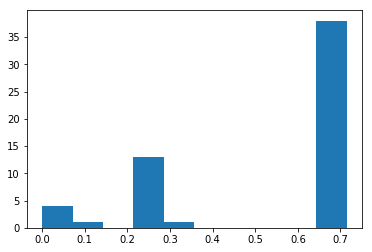

In [4]:
#degree centrality represents the importance of one node and it is defined as: # of neighbors/# of possible neighobors
plt.hist(list(nx.degree_centrality(G).values()))
plt.show()

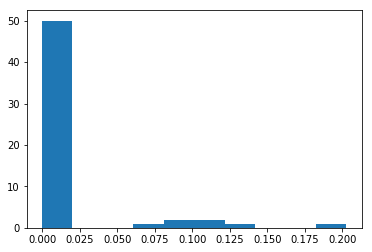

In [5]:
# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.betweenness_centrality(G).values()))
plt.show()


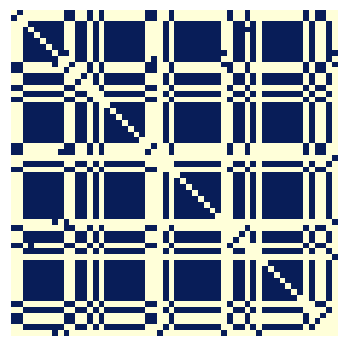

In [6]:
# Calculate the largest connected component subgraph: largest_ccs
largest_ccs = sorted(nx.connected_component_subgraphs(G), key=lambda x: len(x))[-1]

# Create the customized MatrixPlot object: h
h = MatrixPlot(graph = largest_ccs, node_grouping='grouping')

# Draw the MatrixPlot to the screen
h.draw()
plt.show()

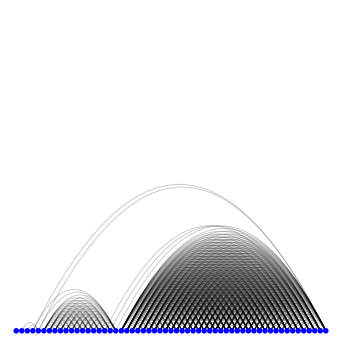

In [7]:
# Import necessary modules
from nxviz.plots import ArcPlot
import matplotlib.pyplot as plt

# Iterate over all the nodes in G, including the metadata
for n, d in G.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree'] = nx.degree(G, n)
    
# Create the ArcPlot object: a
a = ArcPlot(graph=G, node_order='degree')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

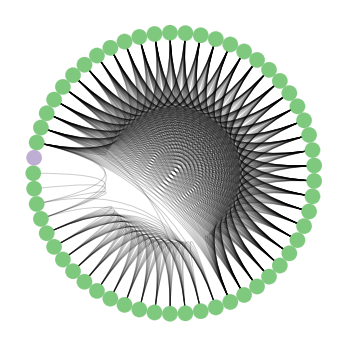

In [8]:
# Iterate over all the nodes in G, including the metadata
for n, d in G.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree'] = nx.degree(G, n)
    
# Create the ArcPlot object: a
c = CircosPlot(graph=G, node_order='degree',node_grouping='grouping',node_color='grouping')

# Draw the ArcPlot to the screen
c.draw()
plt.show()

In [9]:
# Calculate the maximal cliques in G: cliques
cliques = nx.find_cliques(G)

# Count and print the number of maximal cliques in G
print(len(list(cliques)))

8


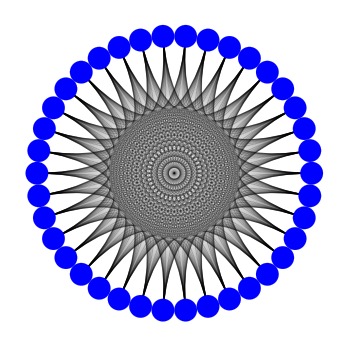

In [10]:
# Find the author(s) that are part of the largest maximal clique: largest_clique
largest_clique = sorted(nx.find_cliques(G), key=lambda x:len(x))[-1]

# Create the subgraph of the largest_clique: G_lc
G_lc = G.subgraph(largest_clique)

# Create the CircosPlot object: c
c = CircosPlot(G_lc)

# Draw the CircosPlot to the screen
c.draw()
plt.show()

### Recommending co-editors who have yet to edit together
We'll now look at important nodes once more. Here, we'll make use of the ```degree_centrality()``` and ```betweenness_centrality()``` functions in NetworkX to compute each of the respective centrality scores, and then use that information to find the "important nodes". In other words, our job in this exercise is to find the user(s) that have collaborated with the most number of users.

* Compute the degree centralities of ```G```. Store the result as ```deg_cent```.
* Compute the maximum degree centrality. Since``` deg_cen```t is a dictionary, we'll have to use the ```.values()``` method to get a list of its values before computing the maximum degree centrality with ```max()```.
* Identify the most prolific collaborators using a list comprehension:
 * Iterate over the degree centrality dictionary ```deg_cent``` that was computed earlier using its ```.items()``` method. What condition should be satisfied if we are seeking to find user(s) that have collaborated with the most number of users?


In [11]:
# Compute the degree centralities of G: deg_cent
deg_cent = nx.degree_centrality(G)

# Compute the maximum degree centrality: max_dc
max_dc = max(deg_cent.values())

# Find the user(s) that have collaborated the most: prolific_collaborators
prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

# Print the most prolific collaborator(s)
print(prolific_collaborators)


['u2159']


### Recommending co-editors who have yet to edit together
Finally, we're going to leverage the concept of open triangles to recommend users on GitHub to collaborate!
* Compile a list of GitHub users that should be recommended to collaborate with one another. To do this:
 * In the first ```for``` loop, iterate over all the nodes in ```G```, including the metadata (by specifying ```data=True```).
 * In the second ```for``` loop, iterate over all the possible triangle combinations, which can be identified using the ```combinations()``` function with a ```size``` of ```2```.
 * If ```n1``` and ```n2``` do not have an edge between them, a collaboration between these two nodes (users) should be recommended, so increment the ```(n1), (n2)``` value of the ```recommended``` dictionary in this case. We can check whether or not ```n1``` and ```n2``` have an edge between them using the ```.has_edge()``` method.
* Using a list comprehension, identify the top 10 pairs of users that should be recommended to collaborate. The iterable should be the key-value pairs of the ```recommended``` dictionary (which can be accessed with the ```.items()``` method), while the conditional should be satisfied if ```count``` is greater than the top 10 in ```all_counts```. Note that```all_counts``` is sorted in ascending order, so we can access the top 10 with ```all_counts[-10]```. 

In [12]:
# Initialize the defaultdict: recommended
recommended = defaultdict(int)

# Iterate over all the nodes in G
for n, d in G.nodes(data=True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
    
        # Check whether n1 and n2 do not have an edge
        if not G.has_edge(n1, n2):
        
            # Increment recommended
            recommended[(n1, n2)] += 1

# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)


[('u534', 'u322'), ('u534', 'u2159'), ('u3305', 'u37'), ('u366', 'u322'), ('u366', 'u3305')]
